## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

 ProjectTweets.csv

### GitHub Repository: 

CCT-Dublin Link:

https://github.com/CCT-Dublin/adv-data-big-data-ft-ca2-denizozsoyugur

The link used since the beginning of the project:

https://github.com/denizozsoyugur/2023195_IntegratedCA2



## Inital Data Processing

In [ ]:
#pip install statsmodels

In [ ]:
#pip install pandas matplotlib

In [ ]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [ ]:
#pip install dash-bootstrap-components

In [ ]:
#pip install plotly

In [ ]:
#pip install numpy

In [ ]:
#pip install pandas

In [ ]:
#pip install pmdarima

In [ ]:
#pip install transformers

In [ ]:
#pip install --upgrade transformers

In [ ]:
#pip install numpy==1.24.0

In [ ]:
#pip install mysql-connector-python

In [ ]:
#pip install -U pandas==1.5.3

In [ ]:
#pip install tf-keras

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import plotly.express as px
import calendar
from transformers import pipeline
import re

from dateutil.parser import parse 
import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# warnings

warnings.filterwarnings('ignore')  

In [3]:
df = pd.read_csv("ProjectTweets.csv")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.columns = ['index', 'id', 'date', 'flag', 'user', 'text']

In [5]:
df = df.iloc[:,1:]

In [6]:
df.describe(include = 'all')

,id,date,flag,user,text
count,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,774362,1,659775,1581465
top,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,20,1599999,549,210
mean,1.998818e+09,NaN,NaN,NaN,NaN
std,1.935757e+08,NaN,NaN,NaN,NaN
min,1.467811e+09,NaN,NaN,NaN,NaN
25%,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.002102e+09,NaN,NaN,NaN,NaN
75%,2.177059e+09,NaN,NaN,NaN,NaN


In [7]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace(r'[^A-Za-z0-9]+',''))

C:\Users\deniz\AppData\Local\Temp\ipykernel_12548\3213551197.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace(r'[^A-Za-z0-9]+',''))


In [8]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace('\\',''))

C:\Users\deniz\AppData\Local\Temp\ipykernel_12548\1778178343.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace('\\',''))


In [9]:
df = df.drop_duplicates()

In [10]:
df.describe(include = 'all')

,id,date,flag,user,text
count,1.598314e+06,1598314,1598314,1598314,1598314
unique,NaN,774362,1,659775,1573475
top,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,Goodmorning
freq,NaN,20,1598314,549,234
mean,1.998872e+09,NaN,NaN,NaN,NaN
std,1.935909e+08,NaN,NaN,NaN,NaN
min,1.467811e+09,NaN,NaN,NaN,NaN
25%,1.956927e+09,NaN,NaN,NaN,NaN
50%,2.002114e+09,NaN,NaN,NaN,NaN
75%,2.177094e+09,NaN,NaN,NaN,NaN


In [11]:
sample_size = 1000
df1 = df.sample(n=sample_size, random_state=42) 

In [ ]:
#sudo mv /home/hduser/2023195_IntegratedCA2/ProjectTweets_2.csv /var/lib/mysql-files/
#LOAD DATA INFILE '/var/lib/mysql-files/ProjectTweets_2.csv' INTO TABLE usertable FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED BY '"' LINES TERMINATED BY '\n' IGNORE 1 LINES;

In [12]:
df.to_csv('ProjectTweets_2.csv', index = False)

In [13]:
sentiment_analyzer = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [14]:
def get_sentiment_score(text):
    result = sentiment_analyzer(text)
    score = result[0]["score"]
    return score

In [15]:
def extract_and_concat(input_string):
    first_5 = input_string[:10]
    last_4 = input_string[-4:]
    return f"{first_5} {last_4}"

In [16]:
def get_sentiment_score(text):
    
    return len(text)

df['sentiment_score'] = df['text'].apply(get_sentiment_score)

In [17]:
dtype_sentiment_score = df['sentiment_score'].dtype
print("sentiment_score dtype:", dtype_sentiment_score)

sentiment_score dtype: int64


In [18]:
df['sentiment_score'] = df['sentiment_score'].astype(float).astype(int).astype(str)

# DataFrame 
print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [19]:
df['full_date'] = pd.to_datetime(df['date']).dt.strftime("%a %b %d %Y")

# DataFrame
print(df)

C:\Users\deniz\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [20]:
df.head(5)

,id,date,flag,user,text,sentiment_score,full_date
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,isupsetthathecantupdatehisFacebookbytextingita...,84,Mon Apr 06 2009
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,KenichanIdivedmanytimesfortheballManagedtosave...,68,Mon Apr 06 2009
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,mywholebodyfeelsitchyandlikeitsonfire,37,Mon Apr 06 2009
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclassnoitsnotbehavingatallimmadwhyam...,81,Mon Apr 06 2009
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,Kwesideinotthewholecrew,23,Mon Apr 06 2009


In [21]:
# "full_date" and "sentiment_score"
df = df[["full_date", "sentiment_score"]]

In [22]:
df.head(5)

,full_date,sentiment_score
0,Mon Apr 06 2009,84
1,Mon Apr 06 2009,68
2,Mon Apr 06 2009,37
3,Mon Apr 06 2009,81
4,Mon Apr 06 2009,23


In [23]:
df['date'] = pd.to_datetime(df['full_date'])
df['score'] = df['sentiment_score']

df = df.drop(['full_date', 'sentiment_score'], axis=1)

print(df)

              date score
0       2009-04-06    84
1       2009-04-06    68
2       2009-04-06    37
3       2009-04-06    81
4       2009-04-06    23
...            ...   ...
1599994 2009-06-16    44
1599995 2009-06-16    55
1599996 2009-06-16    45
1599997 2009-06-16    50
1599998 2009-06-16    53

[1598314 rows x 2 columns]


In [24]:
print(df.dtypes)

date     datetime64[ns]
score            object
dtype: object


In [26]:
df['score'] = pd.to_numeric(df['score'])

In [27]:
print(df.dtypes)

date     datetime64[ns]
score             int64
dtype: object


C:\Users\deniz\AppData\Local\Temp\ipykernel_12548\1329606305.py:20: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'score'}>]], dtype=object)

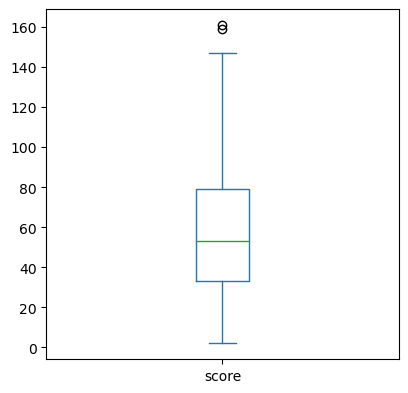

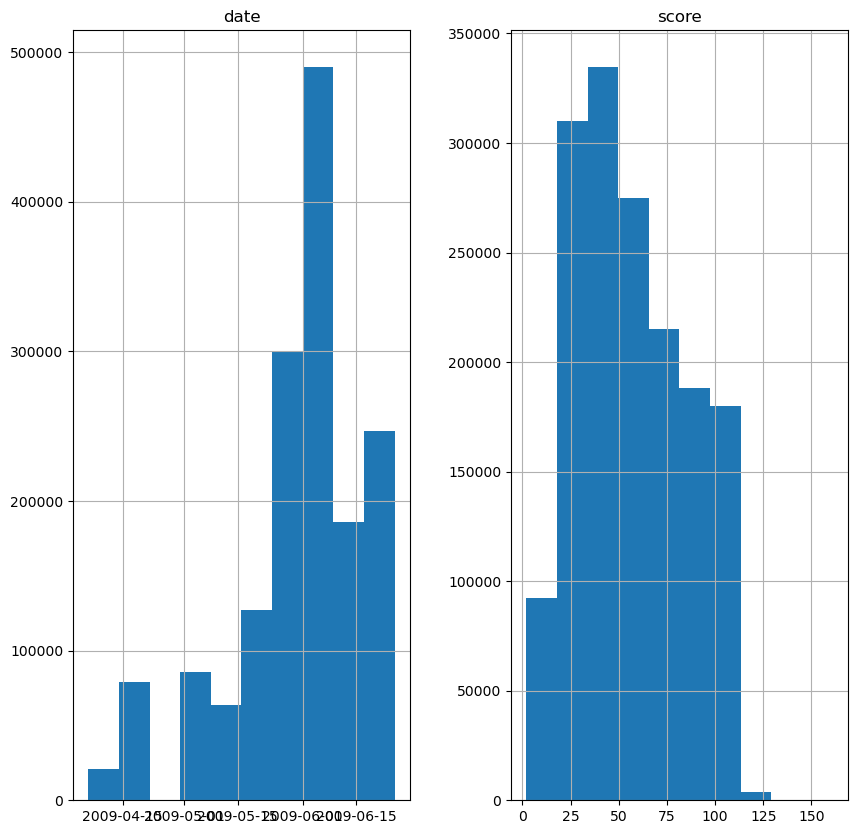

In [29]:
# Check the columns of the dataframe
df.columns

# Check the datatypes of the columns
df.dtypes

# Check the missing values
df.isnull().sum()

# Check the unique values of the columns
df.nunique()

# Check the value counts of the columns
df['score'].value_counts()

# Check the percentage of the value counts of the columns
df['score'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df.describe(include='all')

# Check the outliers
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

# Check the distribution of the columns
df.hist(figsize=(10,10))

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df[df['score'].isnull()]  

,date,score


In [33]:
df = df.groupby('date').mean().reset_index()

In [34]:
# Check the dataframe
print(df.head(3))
print(df.tail(3))

        date      score
0 2009-04-06  57.575604
1 2009-04-07  57.784950
2 2009-04-17  56.847551
         date      score
45 2009-06-23  56.914187
46 2009-06-24  56.808700
47 2009-06-25  57.386615


In [35]:
# Find the missing dates in the dataframe and insert them, leaving the sentiment_score column as Null
idx = pd.date_range('2009-04-06', '2009-06-25')
df = df.set_index('date').reindex(idx).rename_axis('date').reset_index()

# Check the dataframe
print(df.head(3))

        date      score
0 2009-04-06  57.575604
1 2009-04-07  57.784950
2 2009-04-08        NaN


In [36]:
# Fill in the null values using interpolation
df['score'] = df['score'].interpolate(method='linear')

Shape: 
(81, 2)

Columns: 
Index(['date', 'score'], dtype='object')

Data Types: 
date     datetime64[ns]
score           float64
dtype: object

Missing Values: 
date     0
score    0
dtype: int64

Unique Values: 
date     81
score    81
dtype: int64

Value Counts: 
57.575604    1
56.485364    1
57.430632    1
57.343205    1
56.983998    1
            ..
56.589045    1
56.502595    1
56.650062    1
56.797530    1
57.386615    1
Name: score, Length: 81, dtype: int64

Percentage of Value Counts: 
57.575604    0.012346
56.485364    0.012346
57.430632    0.012346
57.343205    0.012346
56.983998    0.012346
               ...   
56.589045    0.012346
56.502595    0.012346
56.650062    0.012346
56.797530    0.012346
57.386615    0.012346
Name: score, Length: 81, dtype: float64

Summary Statistics: 


score    Axes(0.125,0.53;0.352273x0.35)
dtype: object

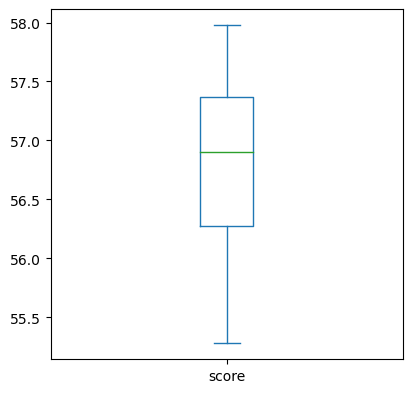

In [37]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df.shape)
print("\n" + "Columns: ")
print(df.columns)
print("\n" + "Data Types: ")
print(df.dtypes)
print("\n" + "Missing Values: ")
print(df.isnull().sum())
print("\n" + "Unique Values: ")
print(df.nunique())
print("\n" + "Value Counts: ")
print(df['score'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df['score'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [38]:
# Describe the df
df.describe(include='all')

C:\Users\deniz\AppData\Local\Temp\ipykernel_12548\2175739720.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,date,score
count,81,81.000000
unique,81,NaN
top,2009-04-06 00:00:00,NaN
freq,1,NaN
first,2009-04-06 00:00:00,NaN
last,2009-06-25 00:00:00,NaN
mean,NaN,56.815873
std,NaN,0.659395
min,NaN,55.279662
25%,NaN,56.276359


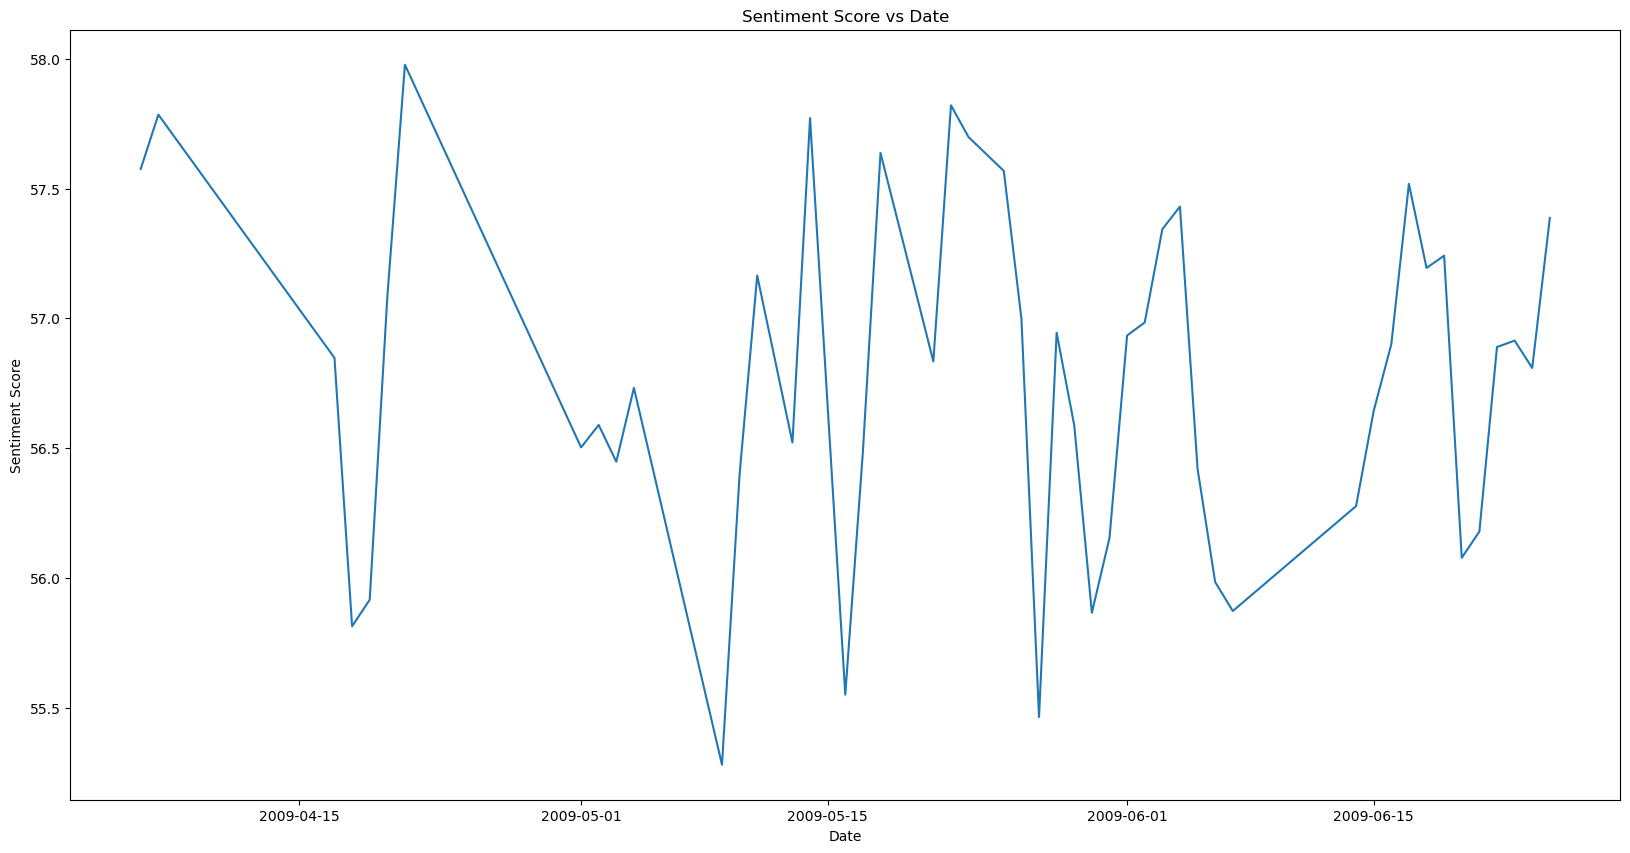

In [40]:
import matplotlib.pyplot as plt

# Plot the sentiment_score
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['score'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs Date')
plt.show()


In [41]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # Print whether the time series is stationary or not, based on the p-value
    if dfoutput[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

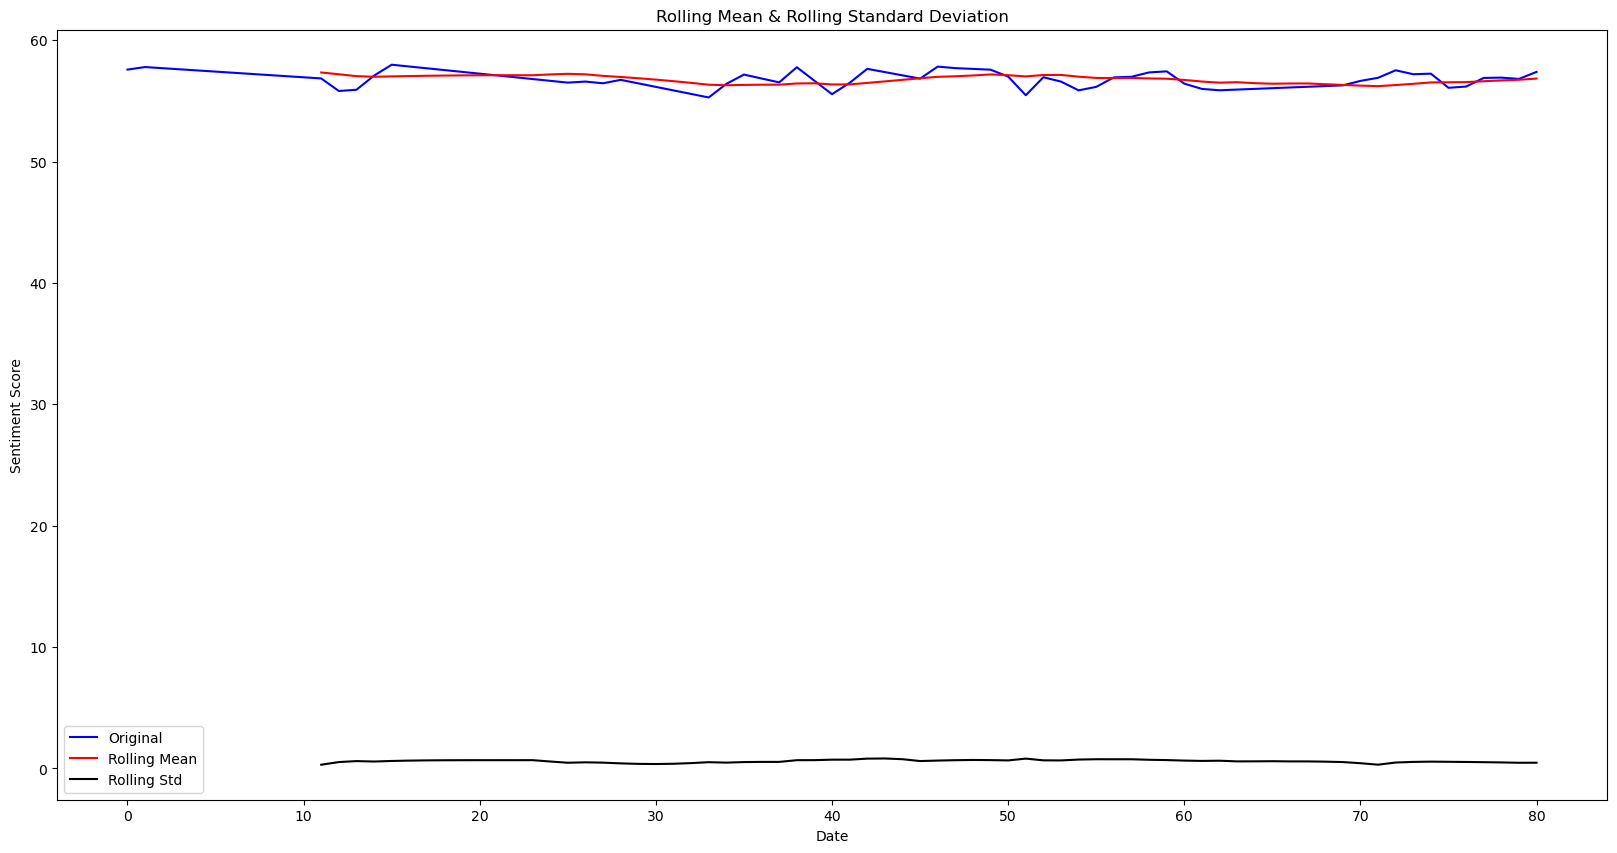

Results of Dickey-Fuller Test:
Test Statistic                 -2.891555
p-value                         0.046339
#Lags Used                      5.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64
The time series is stationary.


In [43]:
from statsmodels.tsa.stattools import adfuller

# Check the stationarity of the time series
check_stationarity(df['score'])

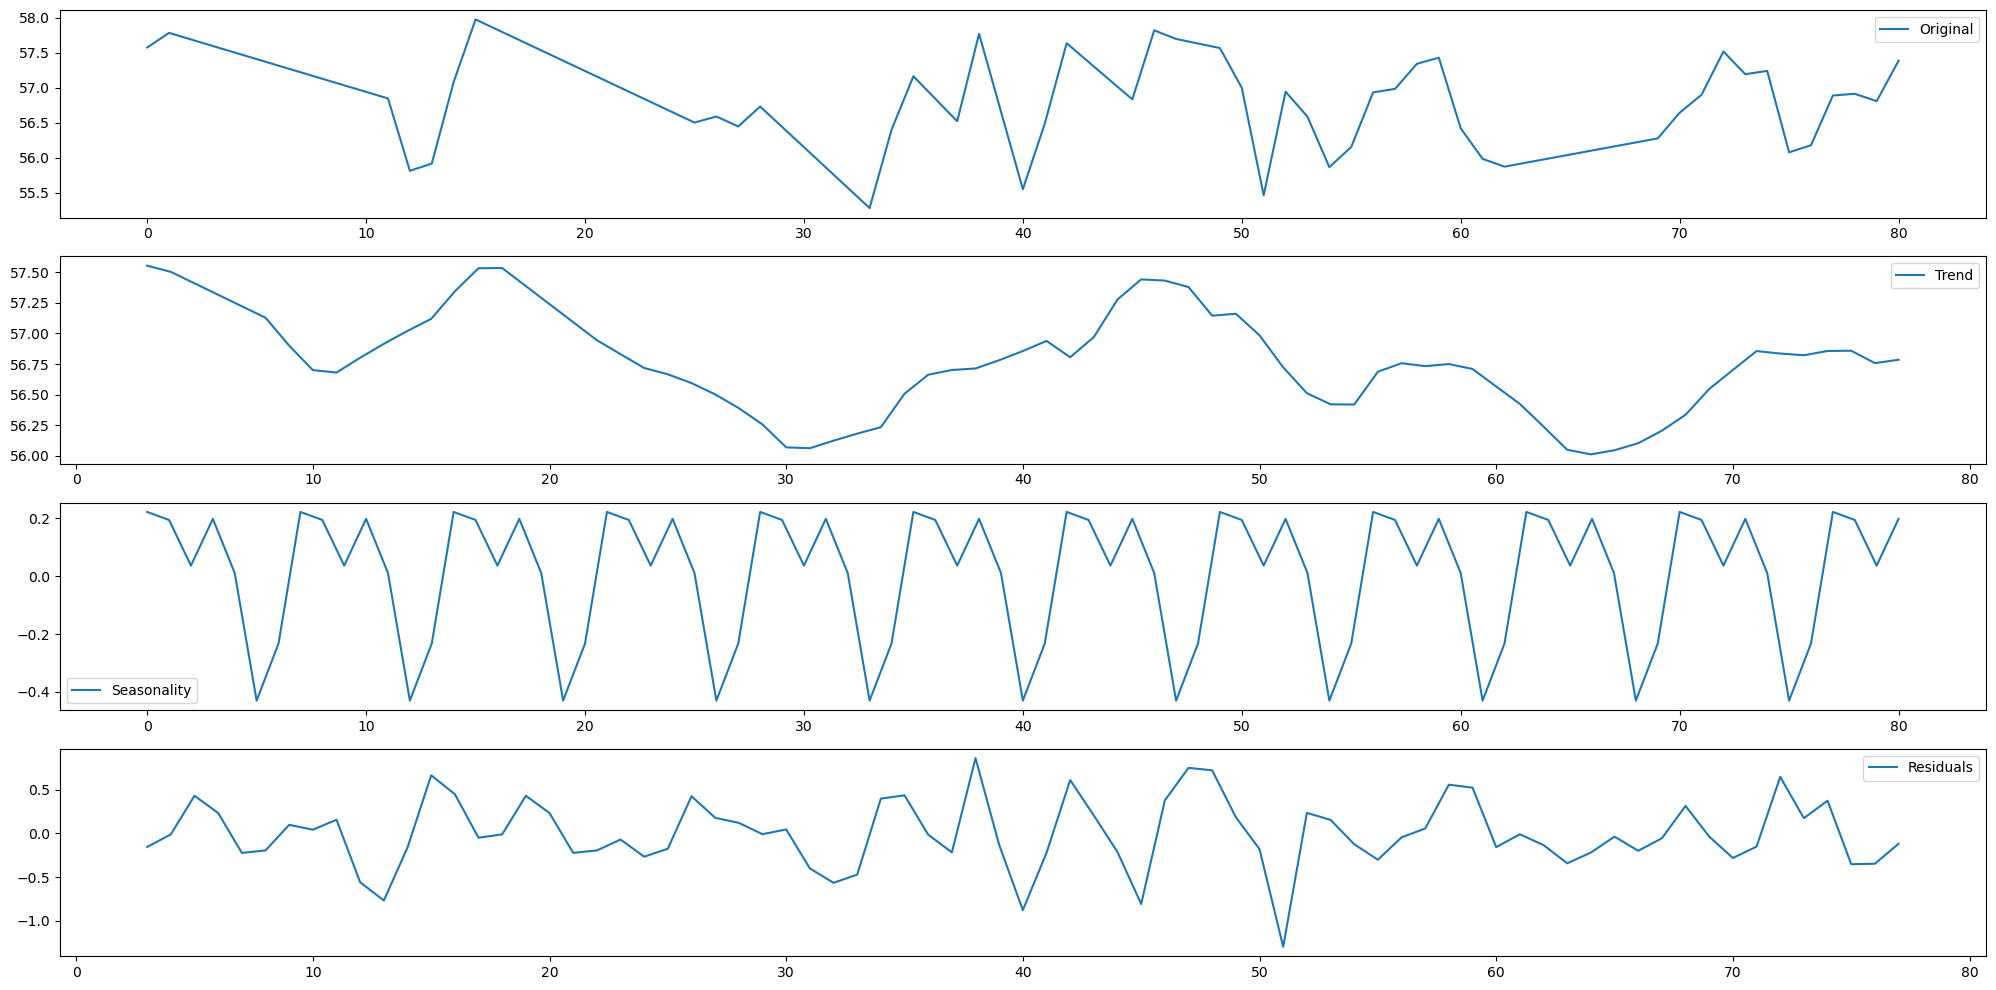

In [46]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df['score'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [48]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

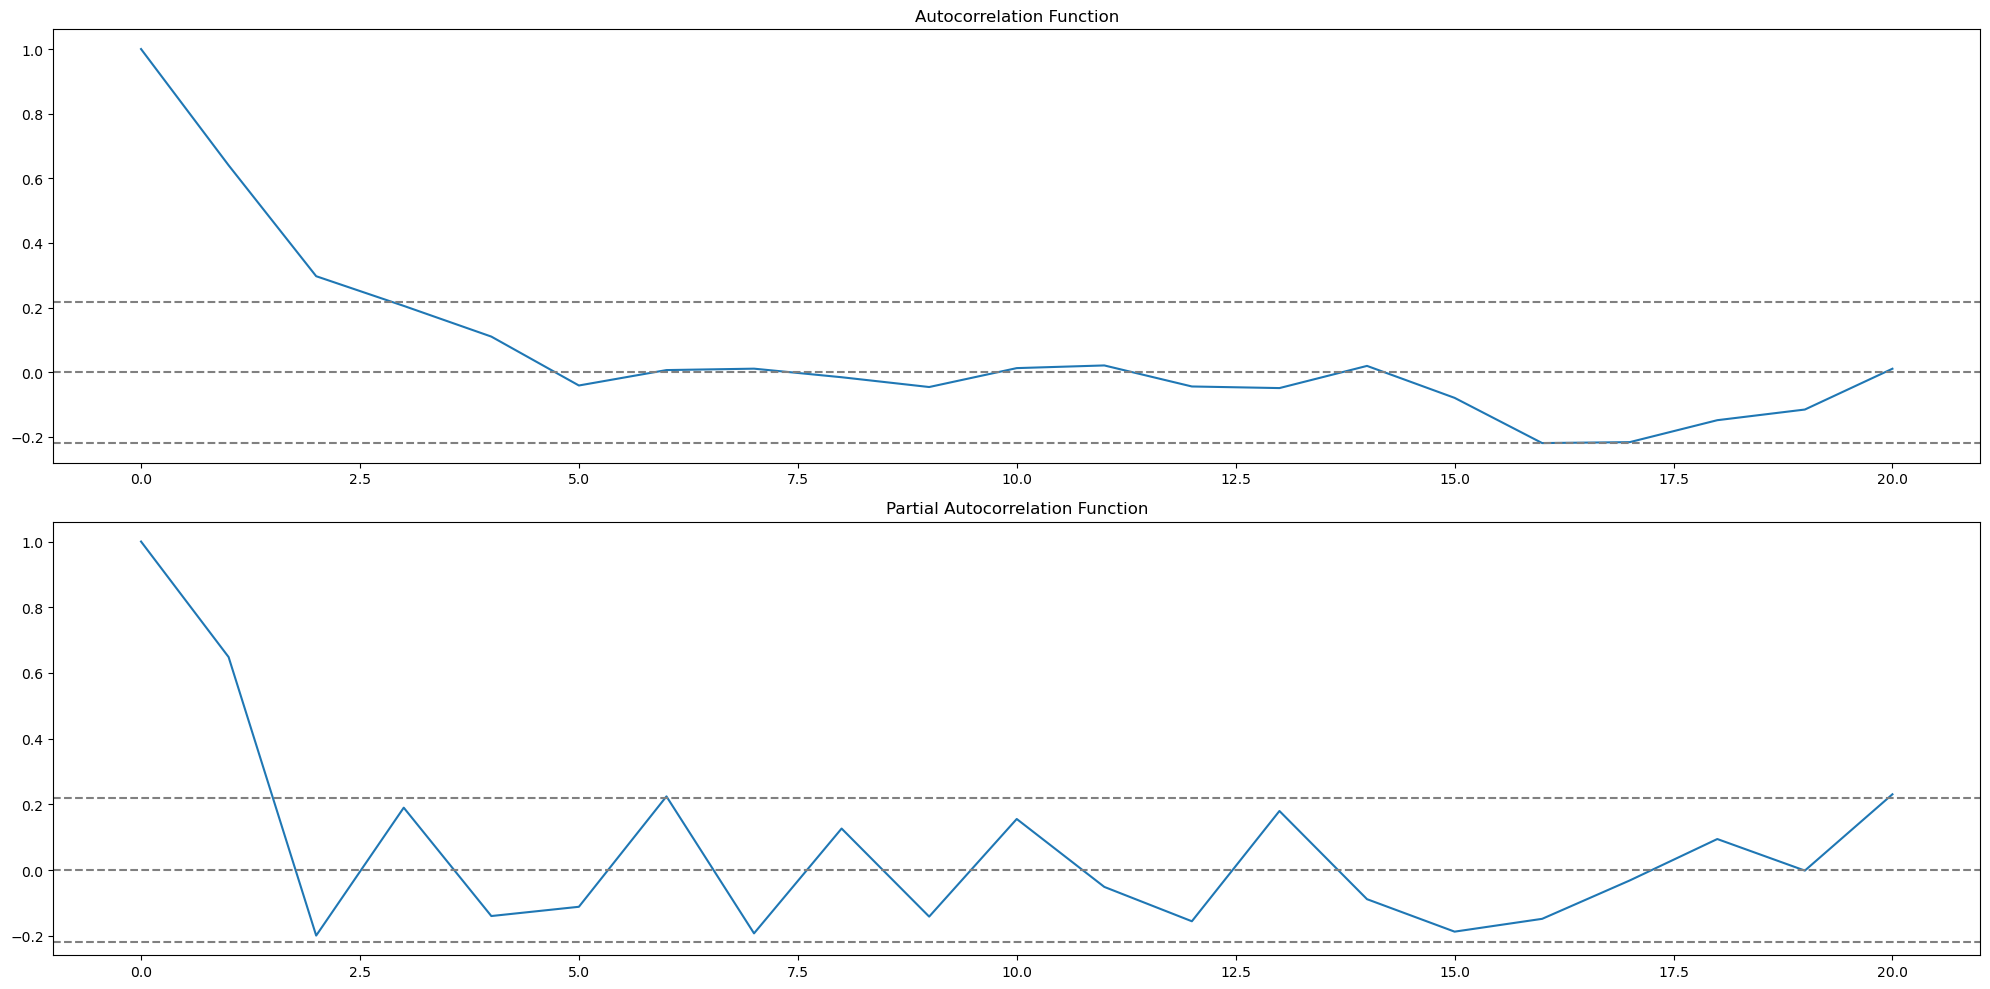

In [52]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf



plot_acf_pacf(df['score'])

In [53]:
# Print the p-values of the 3 stationary time series columns
print(adfuller(df['score'])[1])

0.04633885677173584


## ARIMA MODEL

In [57]:
# We are going to use the sentiment_score_decomposed column for the ARIMA model
df = df[['date', 'score']]

# Set the full_date column as the index
df.set_index('date', inplace=True)

score    0
dtype: int64

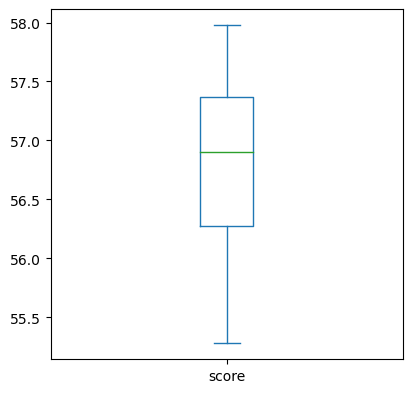

In [58]:
# Check the dataframe for outliers and missing values
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df.isnull().sum()

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Normalise the dataframe
scaler = MinMaxScaler()
df['score'] = scaler.fit_transform(df['score'].values.reshape(-1,1))

In [62]:
# Check the dataframe
print(len(df))
print(round(len(df)*.8))
print(len(df) - round(len(df)*.8))

81
65
16


In [63]:
df.describe(include='all')

,score
count,81.000000
mean,0.569472
std,0.244437
min,0.000000
25%,0.369474
50%,0.600587
75%,0.774691
max,1.000000


(65, 1)
(16, 1)
Train dates : 2009-04-06 00:00:00 --- 2009-06-09 00:00:00  (n=65)
Test dates  : 2009-06-10 00:00:00 --- 2009-06-25 00:00:00  (n=16)


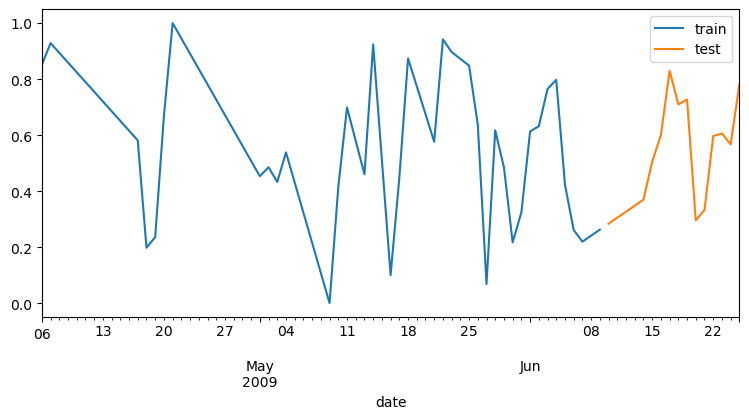

In [65]:
# Split data into train-test
# ==============================================================================
steps = 16
train = df[:-steps]
test  = df[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['score'].plot(ax=ax, label='train')
test['score'].plot(ax=ax, label='test')
ax.legend()

In [67]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1), freq='D')
model_fit = model.fit()
print(model_fit.summary())

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                   65
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  12.459
Date:                Sat, 11 May 2024   AIC                            -18.918
Time:                        02:58:54   BIC                            -12.442
Sample:                    04-06-2009   HQIC                           -16.367
                         - 06-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6486      0.131      4.936      0.000       0.391       0.906
ma.L1         -0.9604      0.074    -12.955      0.000      -1.106      -0.815
sigma2         0.0390      0.006      6.061      0.0

In [68]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [69]:
# Find the best ARIMA model
p_values = [0,1,2,4,6,8,10]
d_values = range(0,3)
q_values = range(0,3)
find_best_arima_model(train, p_values, d_values, q_values)

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(0, 0, 0) AIC=9.976
ARIMA(0, 0, 1) AIC=-20.898
ARIMA(0, 0, 2) AIC=-26.237
ARIMA(0, 1, 0) AIC=-14.115
ARIMA(0, 1, 1) AIC=-12.186
ARIMA(0, 1, 2) AIC=-21.400
ARIMA(0, 2, 0) AIC=31.703


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(0, 2, 1) AIC=-6.828


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) AIC=-4.831
ARIMA(1, 0, 0) AIC=-22.230
ARIMA(1, 0, 1) AIC=-25.353


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(1, 0, 2) AIC=-23.422
ARIMA(1, 1, 0) AIC=-12.131
ARIMA(1, 1, 1) AIC=-18.918


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(1, 1, 2) AIC=-22.058
ARIMA(1, 2, 0) AIC=27.416
ARIMA(1, 2, 1) AIC=-4.830


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(1, 2, 2) AIC=-4.416
ARIMA(2, 0, 0) AIC=-23.039


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(2, 0, 1) AIC=-23.360


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) AIC=-28.960
ARIMA(2, 1, 0) AIC=-20.938
ARIMA(2, 1, 1) AIC=-18.954


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(2, 1, 2) AIC=-20.058
ARIMA(2, 2, 0) AIC=7.548


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(2, 2, 1) AIC=-13.004


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 2) AIC=-11.046
ARIMA(4, 0, 0) AIC=-23.910


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(4, 0, 1) AIC=-22.247


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

ARIMA(4, 0, 2) AIC=-22.890
ARIMA(4, 1, 0) AIC=-17.040
ARIMA(4, 1, 1) AIC=-20.507


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

ARIMA(4, 1, 2) AIC=-18.864
ARIMA(4, 2, 0) AIC=4.916
ARIMA(4, 2, 1) AIC=-9.088


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

ARIMA(4, 2, 2) AIC=-11.139
ARIMA(6, 0, 0) AIC=-23.751


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ARIMA(6, 0, 1) AIC=-25.182


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

ARIMA(6, 0, 2) AIC=-25.111
ARIMA(6, 1, 0) AIC=-20.342
ARIMA(6, 1, 1) AIC=-20.423


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 1, 2) AIC=-21.776


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 2, 0) AIC=-1.665


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 2, 1) AIC=-11.959


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

ARIMA(6, 2, 2) AIC=-12.070
ARIMA(8, 0, 0) AIC=-22.838


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 0, 1) AIC=-21.610


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

ARIMA(8, 0, 2) AIC=-21.787
ARIMA(8, 1, 0) AIC=-19.853


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 1, 1) AIC=-18.161


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

ARIMA(8, 1, 2) AIC=-18.209
ARIMA(8, 2, 0) AIC=-2.650


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

ARIMA(8, 2, 1) AIC=-11.134


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 2, 2) AIC=-9.200
ARIMA(10, 0, 0) AIC=-20.230


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

ARIMA(10, 0, 1) AIC=-18.269


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 0, 2) AIC=-24.266
ARIMA(10, 1, 0) AIC=-18.265


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D w

ARIMA(10, 1, 1) AIC=-16.888


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 1, 2) AIC=-22.761
ARIMA(10, 2, 0) AIC=-7.041


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

ARIMA(10, 2, 1) AIC=-9.342
ARIMA(10, 2, 2) AIC=-8.010
Best ARIMA(2, 0, 2) AIC=-28.960


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2)

In [70]:
# Create the ARIMA model using the best parameters
model = ARIMA(train, freq='D', order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                   65
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  20.480
Date:                Sat, 11 May 2024   AIC                            -28.960
Time:                        03:01:27   BIC                            -15.914
Sample:                    04-06-2009   HQIC                           -23.813
                         - 06-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5835      0.050     11.776      0.000       0.486       0.681
ar.L1         -0.5481      0.169     -3.235      0.001      -0.880      -0.216
ar.L2          0.0233      0.155      0.150      0.8

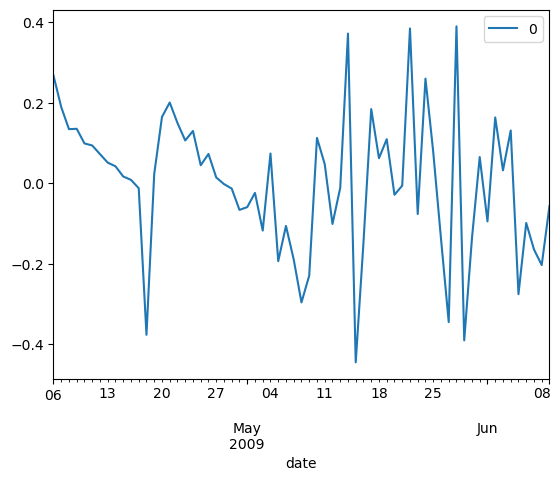

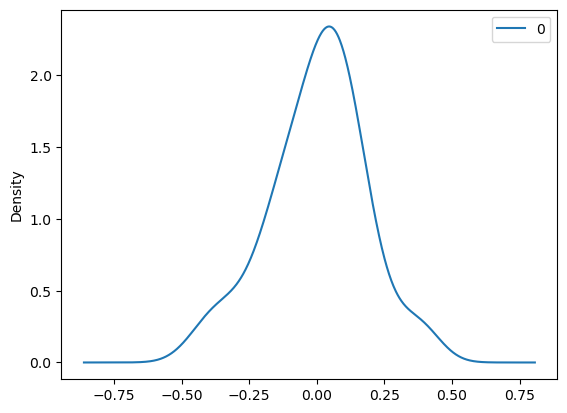

               0
count  65.000000
mean    0.001354
std     0.177917
min    -0.444249
25%    -0.100945
50%     0.016908
75%     0.109517
max     0.389562


In [71]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [72]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [73]:
# Create a function to plot the predictions
def plot_predictions(predictions, test):
    plt.figure(figsize=(20,10))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Actual vs Predicted Sentiment Score')
    plt.legend()
    plt.show()
    
# Create a function to calculate the RMSE and R2 score
def calculate_metrics(test, predictions):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    print('The RMSE is', rmse)
    print('The R2 score is', r2)

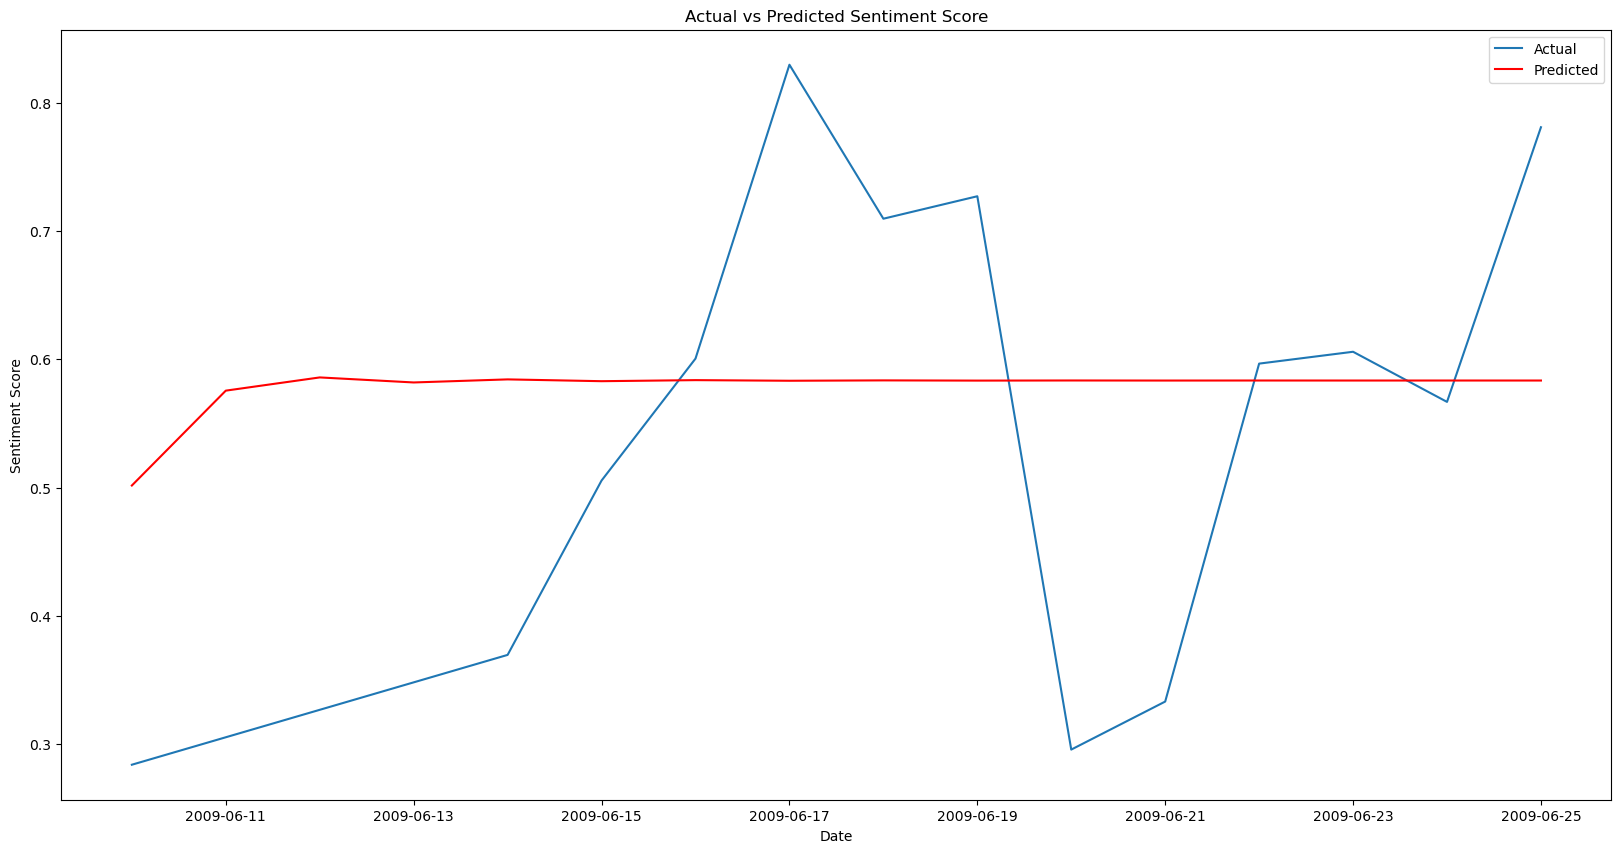

The RMSE is 0.19003807030318795
The R2 score is -90.8676990069426


In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Plot the predictions against the actual values
plot_predictions(predictions, test)

# Calculate the RMSE, MAPE, MAE, and R2 score
calculate_metrics(predictions, test)

In [79]:
# Generate predictions for the entire dataset
predictions_full = model_fit.predict(start=0, end=len(df) - 1)

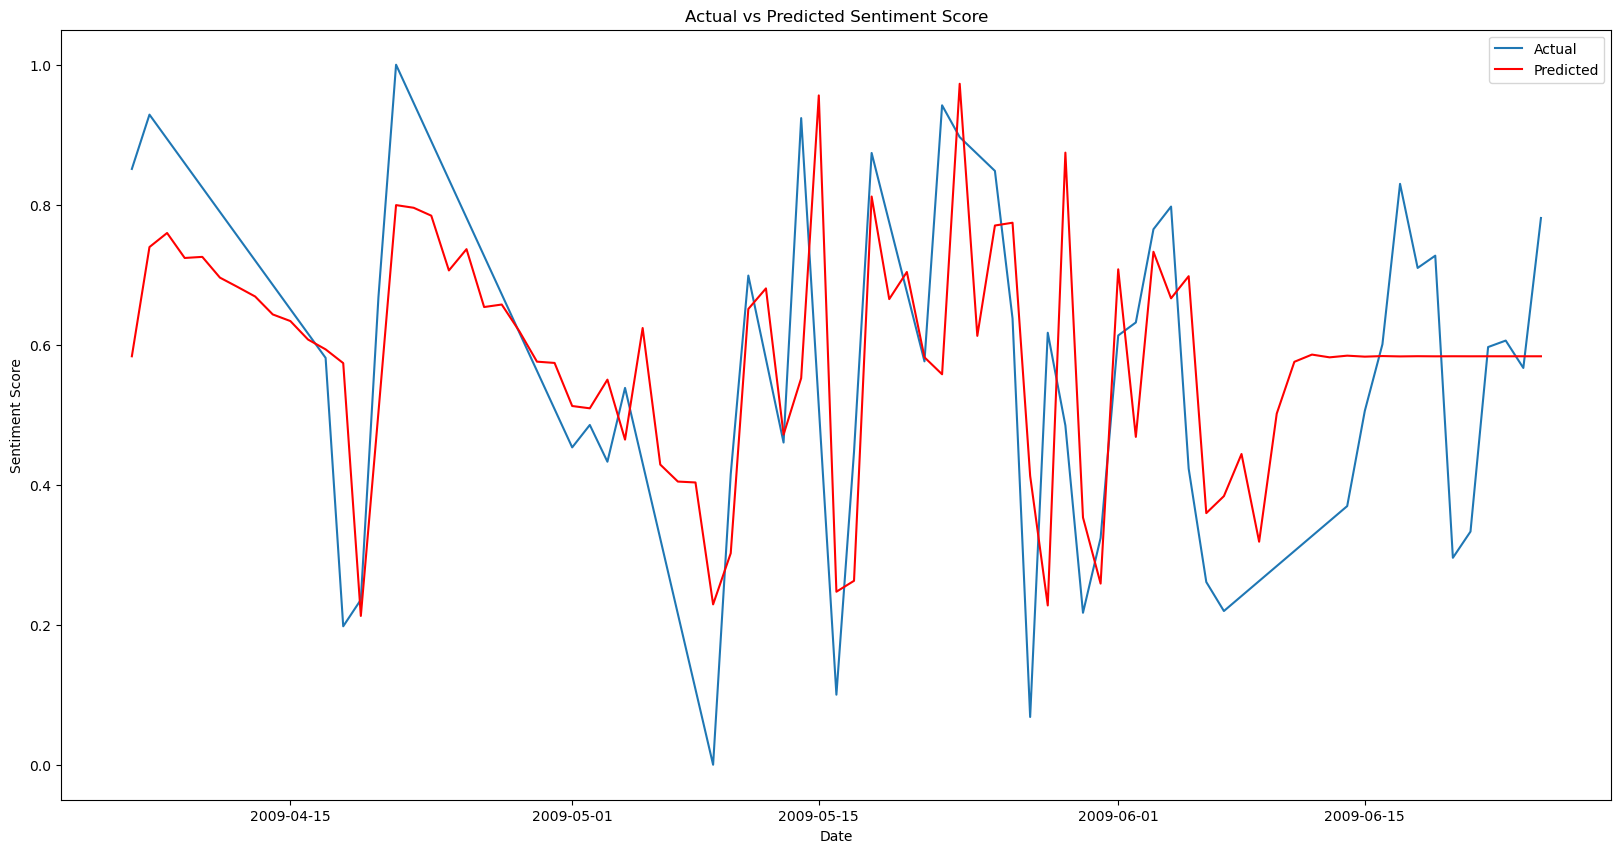

In [80]:
# Plot the entire time series with the predictions
plot_predictions(predictions_full, df)

In [81]:
# Predict the sentiment score for the next 7 days
predictions_next_week = model_fit.predict(start=len(df), end=len(df) + 6)
predictions_next_week = scaler.inverse_transform(predictions_next_week.values.reshape(-1,1))
predictions_next_week = pd.DataFrame(predictions_next_week, columns=['score'])
predictions_next_week['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=7))
predictions_next_week.set_index('date', inplace=True)
predictions_next_week

,score
date,
2009-06-26,56.853678
2009-06-27,56.853671
2009-06-28,56.853675
2009-06-29,56.853673
2009-06-30,56.853674
2009-07-01,56.853673
2009-07-02,56.853674


In [82]:
# Predict the sentiment score for the next 31 days
predictions_next_month = model_fit.predict(start=len(df), end=len(df) + 30)
predictions_next_month = scaler.inverse_transform(predictions_next_month.values.reshape(-1,1))
predictions_next_month = pd.DataFrame(predictions_next_month, columns=['score'])
predictions_next_month['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=31))
predictions_next_month.set_index('date', inplace=True)
predictions_next_month

,score
date,
2009-06-26,56.853678
2009-06-27,56.853671
2009-06-28,56.853675
2009-06-29,56.853673
2009-06-30,56.853674
2009-07-01,56.853673
2009-07-02,56.853674
2009-07-03,56.853674
2009-07-04,56.853674


In [83]:
# 3 months
predictions_next_3months = model_fit.predict(start=len(df), end=len(df) + 89)
predictions_next_3months = scaler.inverse_transform(predictions_next_3months.values.reshape(-1,1))
predictions_next_3months = pd.DataFrame(predictions_next_3months, columns=['score'])
predictions_next_3months['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=90))
predictions_next_3months.set_index('date', inplace=True)
predictions_next_3months

,score
date,
2009-06-26,56.853678
2009-06-27,56.853671
2009-06-28,56.853675
2009-06-29,56.853673
2009-06-30,56.853674
...,...
2009-09-19,56.853674
2009-09-20,56.853674
2009-09-21,56.853674


In [85]:
df.reset_index(inplace=True)

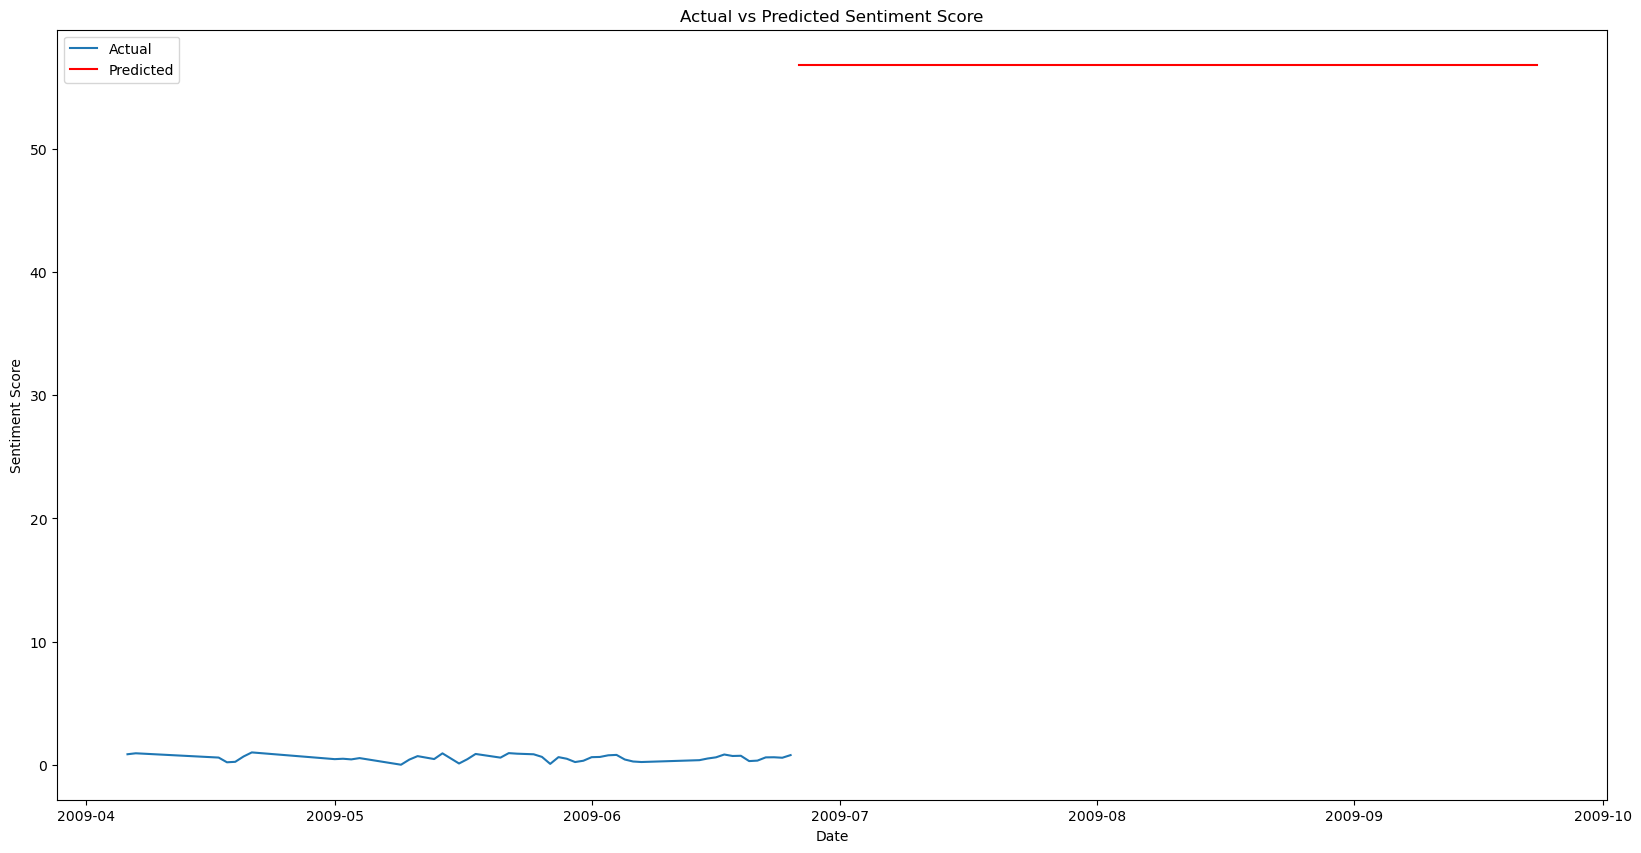

In [86]:
# Plot the entire time series with the predictions
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['score'], label='Actual')
plt.plot(predictions_next_3months, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Actual vs Predicted Sentiment Score')
plt.legend()
plt.show()